# Tree-Based Models

### Definitions
- **Decision-Tree**: data structure consisting of a hierarchy of nodes. 
- **Node**: question or prediction. 
    - Root (initial question)
    - Internal node (questions)
    - Leaf (predictions)
- **Criterions**: Used to find impurity of leafs and decide the order of the tree. 

### Types
- **Decision tree for classification**
    - Sequence of if-else questions about individual features with the goal of infer class labels. 
    - Able to capture non-linear relationships between features and labels.
    - Don't require feature scaling (i.e. Standardization...)
- **Decision tree for regression**

In [ ]:
### Init notebook
import warnings
warnings.filterwarnings('ignore')

### Decision tree for classification

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X = data.data[:, :2]
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instantiate the model
dt = DecisionTreeClassifier(max_depth=4, random_state=1)

# Fit the model with the training data
dt.fit(X_train, y_train)

# Predict the test
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")


The accuracy of the model is: 0.9122807017543859


### Visualize and compare

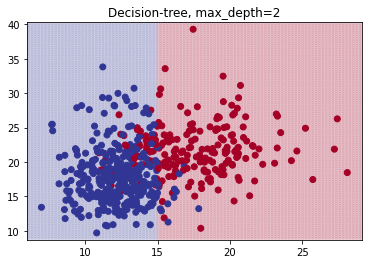

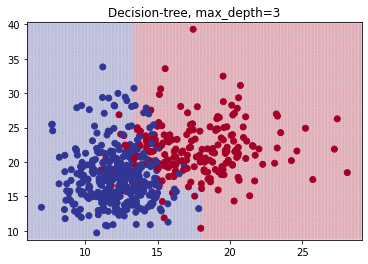

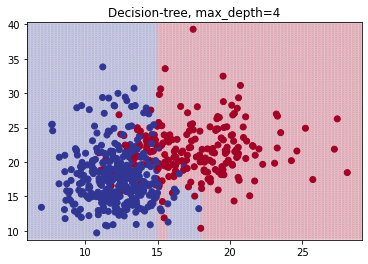

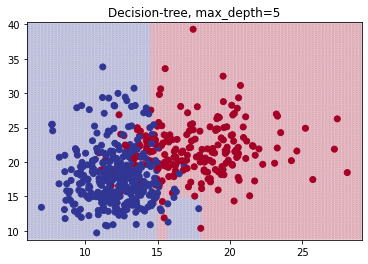

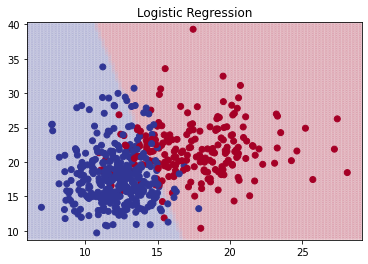

In [70]:
# Compare decision tree with logistic regression
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(feature_1, feature_2, ml_model, title):
    # Create 100 quidistant points in both x and y
    x_min, x_max = feature_1.min() - 1, feature_1.max() + 1
    y_min, y_max = feature_2.min() - 1, feature_2.max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
        )

    # Obtain the predicted value for each point
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred_mesh = ml_model.predict(x_in)
    y_pred_mesh = np.round(y_pred_mesh).reshape(xx.shape)

    # Plot
    color = plt.cm.RdYlBu
    plt.scatter(xx, yy, c=y_pred_mesh, cmap=color, alpha=0.05)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

for max_depth in range(2, 6, 1):
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    dt.fit(X_train, y_train)
    plot_decision_boundaries(feature_1=X[:, 0], feature_2=X[:, 1], ml_model=dt, title=f'Decision-tree, max_depth={max_depth}')


### Compare against Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
plot_decision_boundaries(feature_1=X[:, 0], feature_2=X[:, 1], ml_model=logreg, title=f'Logistic Regression')